# Visualizations

# Part 1: Matplotlib

## a) Scatterplots and Linear Regression:

In this part, you will find out how to:
- present a scatterplot
- fit a line to the data
- calculate and show line equation and correlation
- set axes labels and limit
- set plot title
- set the color and type of line and scatter plots

### Data analysis

In [5]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import os
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression


# reading and prepare data
met_df = pd.read_csv('./seattleWeather_1948-2017.csv')

# imputing missing values
P_median = met_df.PRCP.median()
met_df.PRCP.fillna(P_median, inplace = True)

# changing DATE variable to datetime format
date = pd.to_datetime(met_df.DATE, format="%Y-%m-%d")
met_df['DATE'] = date

# creating daily climatological variables
from datetime import datetime
DoY_str = met_df.DATE.dt.strftime('%j')
Day_of_Year = [int(a) for a in DoY_str]
#group data based on "day of year"
groupD      = met_df.groupby(Day_of_Year)
DoY_TMAX   = groupD['TMAX'].mean()  # daily climatological mean TMAX
daily_TMAX = [DoY_TMAX[a] for a in Day_of_Year]
## daily PRCP
#group data based on "day of year"
DoY_PRCP   = groupD['PRCP'].mean()  # daily climatological mean PRCP
daily_PRCP = [DoY_PRCP[a] for a in Day_of_Year]

# adding new variables to DataFrame
daily_PRCP_df  = pd.DataFrame(daily_PRCP,  columns = ['daily_PRCP'])
daily_TMAX_df  = pd.DataFrame(daily_TMAX,  columns = ['daily_TMAX'])

met_new_df = pd.concat([daily_TMAX_df,daily_PRCP_df], axis = 1)

# defining x and y
X, Y = met_new_df['daily_TMAX'].values.reshape(-1, 1), met_new_df['daily_PRCP']

In [11]:
# calculating linear regression parameters
Lin_Reg = LinearRegression()
Lin_Reg.fit(X, Y)
R_squared_train = Lin_Reg.score(X, Y)

### Plot

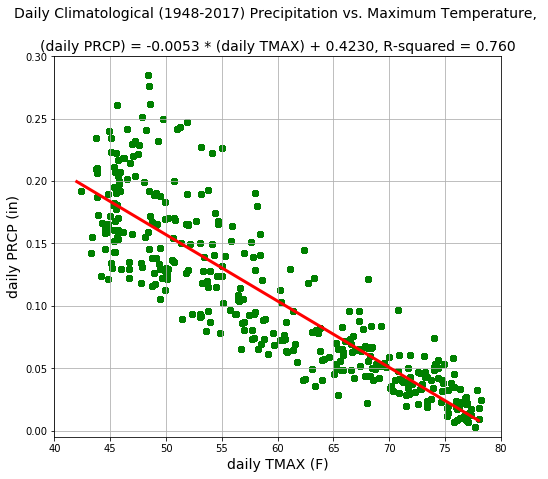

In [46]:
# defining linear regression variables:
T = np.array(range(42,79))
P = Lin_Reg.coef_[0] *  T + Lin_Reg.intercept_

# scatterplot and linear fit:
fig, ax1 = plt.subplots(figsize=(8, 7))
plt.plot(T, P, c = 'red', lw = 3)
plt.scatter(X, Y, c = 'green', marker = 'o')

# axes and title:
ax1.set_xlabel('daily TMAX (F)', fontsize=14)
ax1.set_ylabel('daily PRCP (in)', fontsize=14)
plt.xlim([40, 80])
plt.ylim([-0.005, 0.3])

TITLE1 = 'Daily Climatological (1948-2017) Precipitation vs. Maximum Temperature, \n \n'
TITLE2 = '(daily PRCP) = %.4f'% Lin_Reg.coef_
TITLE3 = ' * (daily TMAX) + %.4f, ' %Lin_Reg.intercept_
TITLE4 = 'R-squared = %.3f'% R_squared_train

ax1.set_title(TITLE1+TITLE2+TITLE3+TITLE4, fontsize=14)
plt.grid(True)
plt.show()